# Sanbercode Basic Python for Data Science
# Final Project Guide
---
---
---

## 1. Business/Project Understanding

- Explain project's background and requirement.

- Explain project's background and requirement.
    - Latar Belakang Proyek:
        Proyek ini bertujuan untuk mengkategorikan negara-negara berdasarkan faktor sosial ekonomi dan kesehatan. Tujuan akhirnya adalah membantu HELP International, sebuah LSM kemanusiaan, untuk mendistribusikan dana bantuan sebesar $10 juta secara strategis dan efektif. Dengan mengelompokkan negara-negara tersebut, kita dapat mengidentifikasi kelompok negara yang paling membutuhkan bantuan, sehingga CEO dapat membuat keputusan berbasis data untuk memprioritaskan negara-negara yang membutuhkan.
    
    - Permasalahan
        HELP International telah berhasil mengumpulkan sekitar $10 juta, dan CEO harus memutuskan bagaimana cara mendistribusikan bantuan ini secara efektif. Tugas dari proyek ini adalah mengkategorikan negara-negara menggunakan berbagai faktor sosial ekonomi dan kesehatan yang mempengaruhi perkembangan negara secara keseluruhan. Tujuannya adalah untuk mengidentifikasi negara mana yang paling membutuhkan bantuan, sehingga dana yang tersedia dapat digunakan dengan bijaksana.

    - Tentang Organisasi:
        HELP International adalah organisasi kemanusiaan global yang berkomitmen untuk memerangi kemiskinan dan menyediakan layanan serta bantuan dasar bagi masyarakat di negara-negara terbelakang, terutama saat terjadi bencana atau krisis.

---
---

## 2. The Data

### 2.1 Dataset Understanding
1. Elaborate the source data you're working with.
    -  What are the dataset's features?
        - Negara: Nama negara yang diamati.
        - Kematian_anak: Jumlah kematian anak di bawah usia 5 tahun per 1000 kelahiran hidup. Fitur ini mengindikasikan tingkat kesehatan dan kualitas hidup anak di negara tersebut.
        - Ekspor: Nilai ekspor barang dan jasa per kapita. Ekspor yang lebih tinggi sering kali mengindikasikan perekonomian yang lebih terbuka dan terintegrasi dengan pasar internasional.
        - Kesehatan: Total pengeluaran kesehatan per kapita. Fitur ini menunjukkan investasi dalam sistem kesehatan negara.
        - Impor: Nilai impor barang dan jasa per kapita. Impor yang tinggi bisa menunjukkan ketergantungan pada barang dan jasa dari luar negeri.
        - Pendapatan: Pendapatan bersih per orang, menunjukkan kesejahteraan ekonomi penduduk di negara tersebut.
        - Inflasi: Tingkat pertumbuhan tahunan dari GDP, mengukur perubahan harga barang dan jasa di negara tersebut.
        - Harapan_hidup: Rata-rata jumlah tahun yang diperkirakan akan hidup oleh seorang anak yang baru lahir jika pola kematian saat ini tetap sama.
        - Jumlah_fertiliti: Rata-rata jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan saat ini tetap sama.
        - GDPperkapita: GDP per kapita, dihitung sebagai total GDP dibagi dengan total populasi. Fitur ini menunjukkan tingkat output ekonomi per orang di negara tersebut.

    -  How many rows it has?
        - Dataset ini memiliki 167 baris dan 10 kolom.

In [1]:
import pandas as pd

# Memuat dataset
file_path = 'C:/Bootcamp-Python DS/Project Python DS/src/Final Project/Data_Negara_HELP.csv'
data = pd.read_csv(file_path)
df_properti = pd.DataFrame(data)
print(df_properti)

                  Negara  Kematian_anak  Ekspor  Kesehatan  Impor  Pendapatan  \
0            Afghanistan           90.2    10.0       7.58   44.9        1610   
1                Albania           16.6    28.0       6.55   48.6        9930   
2                Algeria           27.3    38.4       4.17   31.4       12900   
3                 Angola          119.0    62.3       2.85   42.9        5900   
4    Antigua and Barbuda           10.3    45.5       6.03   58.9       19100   
..                   ...            ...     ...        ...    ...         ...   
162              Vanuatu           29.2    46.6       5.25   52.7        2950   
163            Venezuela           17.1    28.5       4.91   17.6       16500   
164              Vietnam           23.3    72.0       6.84   80.2        4490   
165                Yemen           56.3    30.0       5.18   34.4        4480   
166               Zambia           83.1    37.0       5.89   30.9        3280   

     Inflasi  Harapan_hidup

### 2.2 EDA Part 1
1. Do multivariate analysis on the dataset to catch the glimpse of the relation between datasets' features.

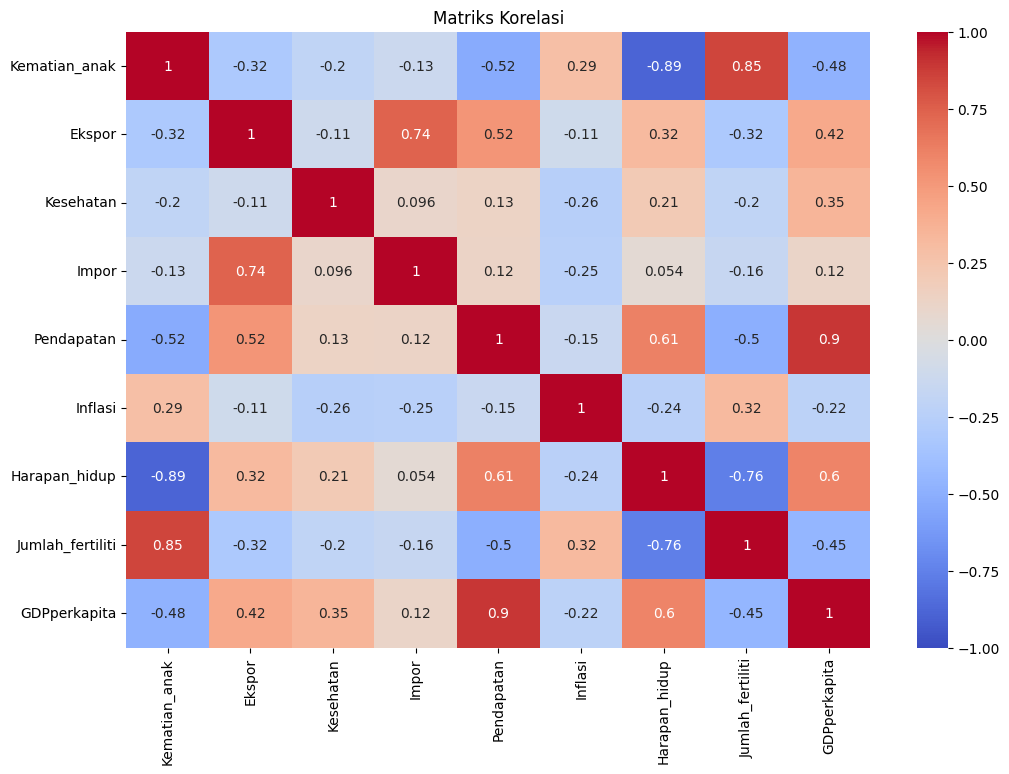

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(data.drop(columns='Negara').corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

plt.title("Matriks Korelasi")
plt.show()


Multivariate analysis adalah salah satu metode yang berguna untuk menentukan hubungan dan menganalisis pola dalam kumpulan data. Heatmap adalah metode yang sering digunakan untuk Analysis Multivariate. Disamping ini adalah kode untuk membuat heatmap yang menunjukan korelasi antar variabel dalam dataset.  Dari output yang didapat, bisa disimpulkan sebagai berikut: 

  - Warna merah menunjukkan korelasi positif yang kuat, sedangkan warna biru menunjukkan korelasi negatif yang kuat.
  - Misalnya, 'Harapan_hidup' memiliki korelasi negatif yang sangat kuat dengan 'Kematian_anak' (-0.89), yang menunjukkan bahwa semakin tinggi harapan hidup, semakin rendah angka kematian anak.
  - Sebaliknya, 'Pendapatan' dan 'GDPperkapita' memiliki korelasi positif yang sangat kuat (0.9), yang menunjukkan bahwa peningkatan pendapatan cenderung terkait dengan peningkatan GDP per kapita.


### 2.3 Feature Selection
1. Choose 2 features of the dataset to be used as the base of analyses and clustering.<b>*</b>
2. Elaborate the reason you chose them.

1. Pendapatan (Income):
- Alasan Pemilihan: Pendapatan merupakan salah satu indikator utama dari kesejahteraan ekonomi individu dan negara. Ini mencerminkan kapasitas ekonomi yang dapat mempengaruhi berbagai aspek kehidupan, termasuk akses ke pendidikan, kesehatan, dan kualitas hidup secara umum. Dalam konteks analisis dan clustering, Pendapatan sering digunakan untuk mengelompokkan negara atau individu berdasarkan tingkat kemakmuran ekonomi mereka. Ini memungkinkan kita untuk mengidentifikasi pola dan kelompok yang memiliki karakteristik ekonomi serupa, serta untuk memahami bagaimana tingkat pendapatan memengaruhi aspek lainnya seperti kesehatan.

2. Kesehatan (Health):
- Alasan Pemilihan: Kesehatan adalah indikator penting dari kualitas hidup dan sistem perawatan kesehatan di suatu negara. Ini mencakup faktor-faktor seperti akses ke layanan kesehatan, kualitas perawatan medis, dan hasil kesehatan masyarakat. Kesehatan yang lebih baik sering berhubungan dengan infrastruktur yang lebih baik dan akses ke layanan kesehatan yang lebih baik. Dalam analisis dan clustering, Kesehatan dapat membantu mengidentifikasi negara atau individu dengan kondisi kesehatan yang serupa dan memungkinkan untuk menganalisis bagaimana aspek kesehatan terkait dengan faktor-faktor ekonomi seperti Pendapatan.

    - Alasan Mengapa Kedua Fitur Ini Dipilih Bersama:
        - Korelasi dan Keterkaitan: Pendapatan dan Kesehatan sering memiliki korelasi positif, dimana negara dengan pendapatan yang lebih tinggi cenderung memiliki hasil kesehatan yang lebih baik. Dengan memilih kedua fitur ini, kita dapat mengeksplorasi hubungan antara kemakmuran ekonomi dan kualitas kesehatan, serta mengidentifikasi pola-pola yang mungkin ada dalam data.

### 2.4 Data Cleaning
1. Missing values



- Check if exist.

In [3]:
df_properti = data
df_properti.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

Hasil dari kode ini adalah jumlah missing values di setiap kolom dalam DataFrame

- Handle if exist.

In [4]:
df_properti.dropna(inplace=True)
df_properti.fillna(df_properti.mean(numeric_only=True), inplace=True)

- Recheck after handling (see the handling result).

In [5]:
recheck_missing_values = df_properti.isnull().sum()
print(recheck_missing_values)

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64


Kode ini digunakan untuk memeriksa kembali apakah masih ada missing values dalam DataFrame df_properti setelah melakukan tindakan penanganan sebelumnya (seperti dropna atau fillna).

- Elaborate how exactly you handle them.
    - Menghapus Baris dengan Missing Values:
        - Pada langkah pertama, kita menggunakan df_properti.dropna(inplace=True) untuk menghapus semua baris yang memiliki missing values (nilai yang hilang). Perintah ini menginstruksikan DataFrame untuk secara langsung menghapus baris-baris yang berisi data kosong atau NaN (Not a Number).

    - Mengisi Missing Values dengan Nilai Rata-Rata:
        - Setelah menghapus baris yang memiliki missing values, langkah selanjutnya adalah menggunakan df_properti.fillna(df_properti.mean(numeric_only=True), inplace=True) untuk mengisi semua missing values yang tersisa dengan nilai rata-rata dari setiap kolom. Parameter numeric_only=True memastikan bahwa hanya kolom numerik yang dihitung rata-ratanya dan diisi, sedangkan inplace=True berarti operasi ini dilakukan secara langsung pada DataFrame tanpa membuat salinan.

- Elaborate why do you handle them in such way.
    - Mengisi missing values dengan nilai rata-rata adalah metode yang saya gunakan ketika ingin mempertahankan ukuran dataset dan tidak ingin kehilangan data. Ini bisa menjadi pendekatan yang berguna ketika data yang hilang cukup banyak dan menghapus baris dapat menyebabkan hilangnya informasi yang signifikan. Metode ini diasumsikan bahwa nilai rata-rata dari data yang ada cukup mewakili nilai yang hilang.

2. Ouliers

- Check if exist (Even better if graphical representation is used).

Text(0.5, 1.0, "Boxplot 'Pendapatan' Sebelum Penanganan Outliers")

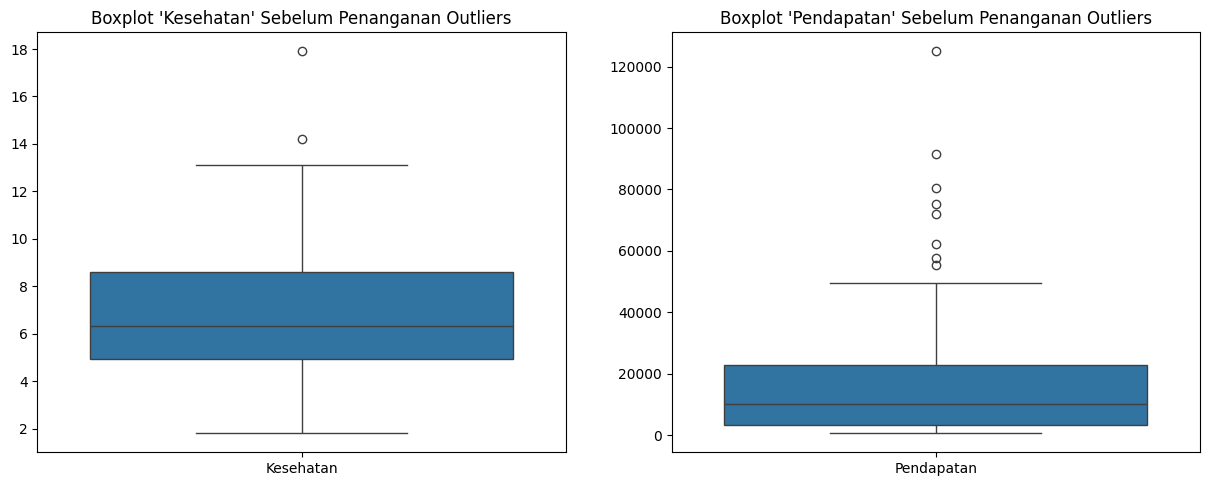

In [6]:
data['Kesehatan'] = pd.to_numeric(data['Kesehatan'], errors='coerce')
data['Pendapatan'] = pd.to_numeric(data['Pendapatan'], errors='coerce') 

selected_columns = ['Kesehatan', 'Pendapatan']
data_selected = data[selected_columns]

data_selected = data_selected.fillna(data_selected.median())

# Boxplot 'Kesehatan' sebelum penanganan
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
sns.boxplot(data=data_selected[['Kesehatan']])
plt.title("Boxplot 'Kesehatan' Sebelum Penanganan Outliers")

# Boxplot 'Pendapatan' sebelum penanganan
plt.subplot(2, 2, 2)
sns.boxplot(data=data_selected[['Pendapatan']])
plt.title("Boxplot 'Pendapatan' Sebelum Penanganan Outliers")

- Hasil Visualisasi:
    - Boxplot 'Kesehatan':
        - Distribusi Data: Boxplot ini menunjukkan bahwa nilai-nilai 'Kesehatan' tersebar dari sekitar 2 hingga 18. Median (garis horizontal di dalam kotak) berada sekitar 6, menunjukkan bahwa setengah dari nilai 'Kesehatan' berada di bawah 6 dan setengah lainnya di atas 6.
        - Outliers: Ada beberapa titik data di atas 14 yang dianggap sebagai outliers, karena berada jauh di luar batas atas (upper whisker) dari boxplot. Titik-titik ini mewakili nilai 'Kesehatan' yang sangat tinggi dibandingkan dengan nilai-nilai lainnya dalam dataset.

    - Boxplot 'Pendapatan':
        - Distribusi Data: Pada boxplot ini, nilai 'Pendapatan' memiliki rentang yang jauh lebih luas, dengan beberapa nilai yang sangat tinggi di atas 120.000. Median dari 'Pendapatan' berada di sekitar 20.000, menunjukkan bahwa setengah dari negara-negara dalam dataset memiliki pendapatan di bawah 20.000, dan setengahnya lagi di atas 20.000.
        - Outliers: Terlihat banyak outliers di atas sekitar 50.000, yang menunjukkan bahwa ada beberapa negara dengan pendapatan yang jauh lebih tinggi dibandingkan dengan mayoritas negara lain dalam dataset. Titik-titik ini juga berada jauh di luar whisker, yang menunjukkan bahwa nilai tersebut secara statistik dianggap sebagai outliers.


- Handle if exist.

In [7]:
# Menghitung Q1, Q3, dan IQR
Q1 = data_selected.quantile(0.25)
Q3 = data_selected.quantile(0.75)
IQR = Q3 - Q1

# Menghitung lower bound dan upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mencapping nilai pencilan dengan lower bound dan upper bound
data_capped = data_selected.copy()
for col in selected_columns:
    data_capped[col] = data_capped[col].clip(lower=lower_bound[col], upper=upper_bound[col])

Kode di atas digunakan untuk menangani nilai outlier pada data. Proses ini dilakukan dengan menggunakan metode Interquartile Range (IQR).

- Recheck after handling (see the handling result).

Text(0.5, 1.0, "Boxplot 'Pendapatan' Setelah Penanganan Outliers")

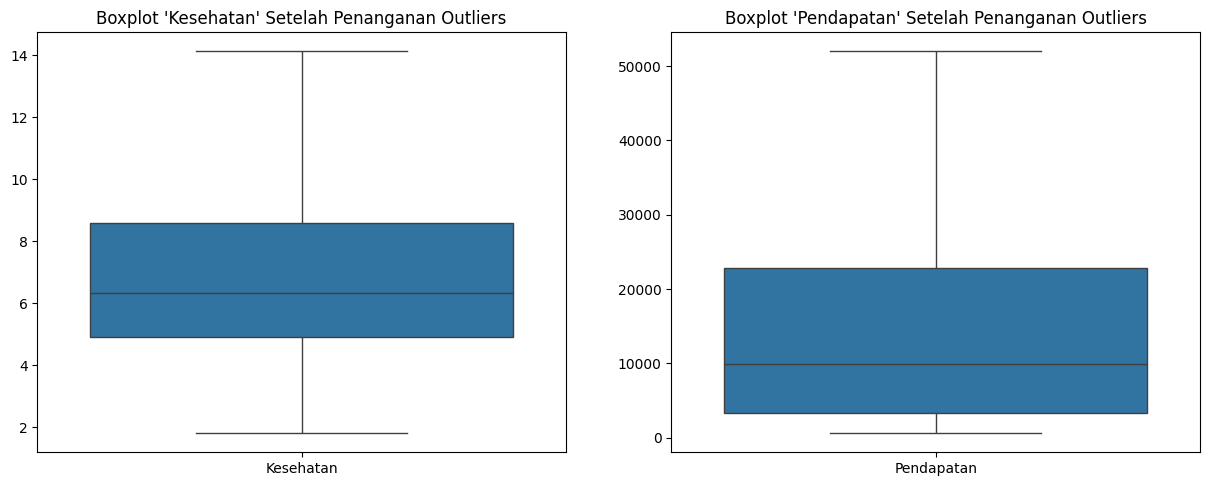

In [8]:
# Boxplot 'Kesehatan' setelah penanganan
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 3)
sns.boxplot(data=data_capped[['Kesehatan']])
plt.title("Boxplot 'Kesehatan' Setelah Penanganan Outliers")

# Boxplot 'Pendapatan' setelah penanganan
plt.subplot(2, 2, 4)
sns.boxplot(data=data_capped[['Pendapatan']])
plt.title("Boxplot 'Pendapatan' Setelah Penanganan Outliers")

- Hasil Visualisasi:
    - Boxplot 'Kesehatan' Setelah Penanganan Outliers:
        - Setelah penanganan outliers, tidak ada lagi titik data yang berada di luar whiskers (ekor) dari boxplot. Ini menunjukkan bahwa semua nilai yang sebelumnya dianggap sebagai outliers telah dibatasi ke dalam rentang yang ditentukan oleh lower bound dan upper bound.

    - Boxplot 'Pendapatan' Setelah Penanganan Outliers:
        - Sama seperti pada 'Kesehatan', outliers pada kolom 'Pendapatan' juga telah di-capping. Sekarang, whiskers pada boxplot lebih panjang, dan tidak ada titik data di luar whiskers.


In [9]:
# Mengecek nilai yang hilang dalam DataFrame setelah penanganan outliers
missing_values = data_capped.isnull().sum()
print("Jumlah Nilai yang Hilang Setelah Penanganan Outliers:")
print(missing_values)


Jumlah Nilai yang Hilang Setelah Penanganan Outliers:
Kesehatan     0
Pendapatan    0
dtype: int64


In [10]:
# Menampilkan bentuk data sebelum dan setelah penanganan outliers
print(f"Bentuk data asli: {data_selected.shape}")
print(f"Bentuk data setelah capping outliers: {data_capped.shape}")
print(data_capped.head())

Bentuk data asli: (167, 2)
Bentuk data setelah capping outliers: (167, 2)
   Kesehatan  Pendapatan
0       7.58      1610.0
1       6.55      9930.0
2       4.17     12900.0
3       2.85      5900.0
4       6.03     19100.0


Dua kode di atas berfungsi untuk rechecking missing values setelah penanganan outliers untuk memastikan bahwa tidak ada data yang hilang selama proses penanganan outliers.

- Elaborate how exactly you handle them.
1. Menghitung Q1, Q3, dan IQR:
    - Q1 = data_selected.quantile(0.25): Menghitung kuartil pertama (Q1) untuk setiap kolom dalam data_selected. Q1 adalah nilai yang memisahkan 25% data terendah dari 75% data lainnya.
    - Q3 = data_selected.quantile(0.75): Menghitung kuartil ketiga (Q3), yang memisahkan 75% data terendah dari 25% data tertinggi.
    - IQR = Q3 - Q1: Menghitung rentang interkuartil (IQR), yang merupakan selisih antara Q3 dan Q1. IQR menggambarkan rentang tengah 50% data, dan digunakan untuk mengidentifikasi nilai outlier.

2. Menghitung Lower Bound dan Upper Bound:
    - lower_bound = Q1 - 1.5 * IQR: Menghitung batas bawah (lower bound) yang digunakan untuk mengidentifikasi outlier di bawah rentang normal. Nilai yang lebih rendah dari batas ini dianggap sebagai outlier.
upper_bound = Q3 + 1.5 * IQR: Menghitung batas atas (upper bound) yang digunakan untuk mengidentifikasi outlier di atas rentang normal. Nilai yang lebih tinggi dari batas ini dianggap sebagai outlier.

3. Mencapping Nilai Pencilan dengan Lower Bound dan Upper Bound:
    - data_capped = data_selected.copy(): Membuat salinan dari data_selected untuk menyimpan data yang telah dicapping (dibatasi).
data_capped[col] = data_capped[col].clip(lower=lower_bound[col], upper=upper_bound[col]): Untuk setiap kolom dalam selected_columns, nilai yang berada di luar batas bawah dan batas atas akan di-capping (dibatasi) ke nilai lower bound atau upper bound yang sesuai. Ini berarti jika ada nilai yang lebih rendah dari lower bound, nilainya akan diubah menjadi lower bound, dan jika ada nilai yang lebih tinggi dari upper bound, nilainya akan diubah menjadi upper bound.

- Elaborate why do you handle them in such way.
1. Stabilisasi Data:
Nilai pencilan dapat sangat mempengaruhi statistik seperti rata-rata dan deviasi standar. Dengan mencapping nilai pencilan, kita mengurangi pengaruh ekstrem yang dapat membuat analisis dan model menjadi bias atau tidak stabil.

2. Menjaga Keakuratan Model:
Banyak algoritma pembelajaran mesin sensitif terhadap pencilan. Menghapus atau mencapping nilai pencilan membantu dalam membangun model yang lebih robust dan akurat, karena model tidak akan terlalu dipengaruhi oleh nilai-nilai ekstrem.

3. Meningkatkan Kualitas Analisis:
Dalam analisis data eksplorasi, pencilan dapat menyebabkan hasil yang tidak representatif atau tidak konsisten. Dengan mengendalikan pencilan, kita dapat memperoleh pemahaman yang lebih baik tentang pola dan hubungan dalam data.

4. Memudahkan Visualisasi:
Pencilan ekstrem bisa membuat visualisasi menjadi sulit untuk diinterpretasikan. Dengan mencapping nilai pencilan, grafik seperti boxplot akan memberikan representasi yang lebih jelas dan berguna dari distribusi data.

5. Mengurangi Variabilitas yang Tidak Diinginkan:
Pencilan sering kali merupakan hasil dari variabilitas yang tidak diinginkan atau kesalahan pengukuran. Dengan mencapping, kita mengurangi dampak dari variabilitas tersebut dan lebih fokus pada data yang relevan dan valid.

### 2.5 EDA Part 2
1. Do univariate analyses on selected features. Elaborate what information you can extract from this.


count    167.000000
mean       6.792575
std        2.668103
min        1.810000
25%        4.920000
50%        6.320000
75%        8.600000
max       14.120000
Name: Kesehatan, dtype: float64


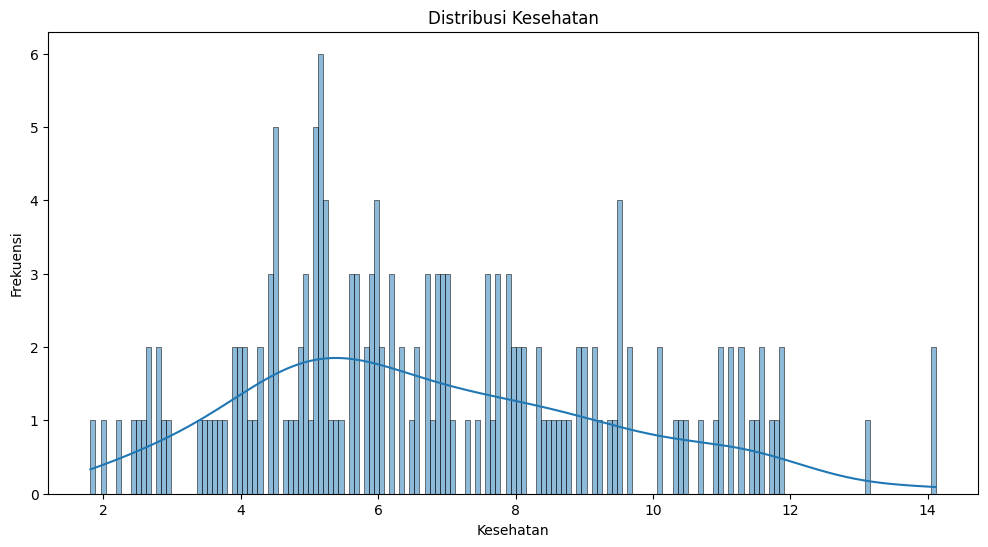

count      167.000000
mean     15921.574850
std      15207.197459
min        609.000000
25%       3355.000000
50%       9960.000000
75%      22800.000000
max      51967.500000
Name: Pendapatan, dtype: float64


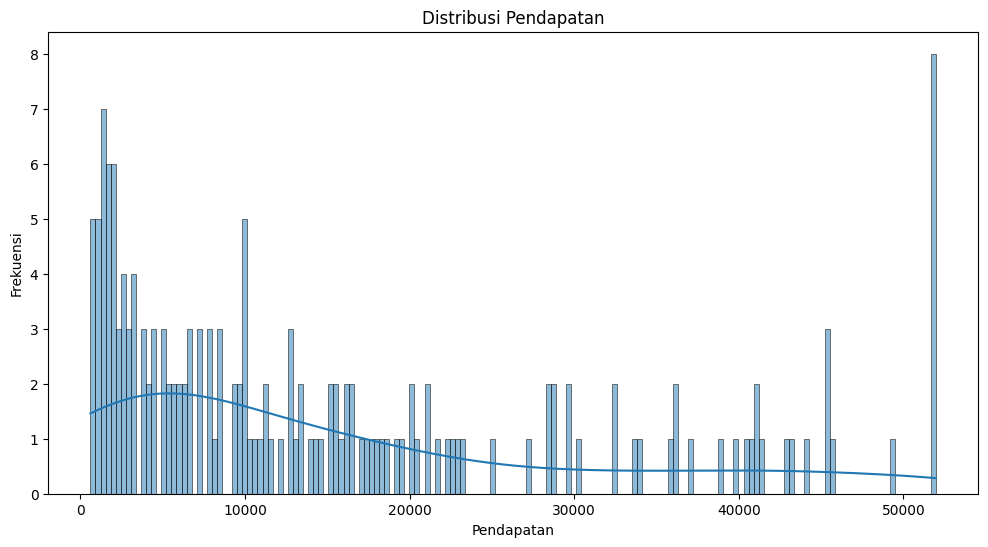

In [11]:
# Univariate analysis

# Histogram untuk distribusi GDPperkapita
print(data_capped['Kesehatan'].describe())
plt.figure(figsize=(12, 6))
sns.histplot(data_capped['Kesehatan'], kde=True, bins=167)
plt.title('Distribusi Kesehatan')
plt.xlabel('Kesehatan')
plt.ylabel('Frekuensi')
plt.show()

# Histogram untuk distribusi Kematian_anak
print(data_capped['Pendapatan'].describe())
plt.figure(figsize=(12, 6))
sns.histplot(data_capped['Pendapatan'], kde=True, bins=167)
plt.title('Distribusi Pendapatan')
plt.xlabel('Pendapatan')
plt.ylabel('Frekuensi')
plt.show()

Dua histogram di samping menggambarkan distribusi data untuk dua variabel, yaitu Pendapatan dan Kesehatan. Berikut penjelasan untuk masing-masing histogram:

 1. Histogram Distribusi Pendapatan:
   - Sumbu X (Pendapatan): Menunjukkan rentang pendapatan, dari yang terendah hingga tertinggi.
   - Sumbu Y (Frekuensi): Menunjukkan frekuensi atau jumlah individu dalam tiap rentang pendapatan.
   - Distribusi: Data pendapatan menunjukkan distribusi yang miring ke kanan (positively skewed), di mana sebagian besar individu memiliki pendapatan yang lebih rendah, sementara hanya sedikit individu yang memiliki pendapatan yang sangat tinggi.
   - Statistik Deskriptif:
     - Mean (Rata-rata): 15.921,57
     - Std (Standar Deviasi): 15.207,20
     - Min (Pendapatan Terendah): 609
     - Max (Pendapatan Tertinggi): 51.967,50
     - Median (50%): 9.960
     - Kuartil (25% dan 75%): 3.355 dan 22.800

   Distribusi ini menunjukkan bahwa rata-rata pendapatan berada di sekitar 15.921,57, tetapi ada banyak outlier yang memiliki pendapatan jauh lebih tinggi daripada mayoritas populasi.

 2. Histogram Distribusi Kesehatan:
   - Sumbu X (Kesehatan): Menunjukkan skor kesehatan.
   - Sumbu Y (Frekuensi): Menunjukkan frekuensi atau jumlah individu dalam tiap rentang skor kesehatan.
   - Distribusi: Distribusi kesehatan lebih mendekati distribusi normal, tetapi agak miring ke kiri (negatively skewed). Sebagian besar individu memiliki skor kesehatan di sekitar nilai tengah, dengan sedikit yang memiliki skor kesehatan sangat tinggi atau sangat rendah.
   - Statistik Deskriptif:
     - Mean (Rata-rata): 6,79
     - Std (Standar Deviasi): 2,67
     - Min (Skor Terendah): 1,81
     - Max (Skor Tertinggi): 14,12
     - Median (50%): 6,32
     - Kuartil (25% dan 75%): 4,92 dan 8,60

   Skor kesehatan rata-rata adalah 6,79, dengan distribusi yang agak menyebar tetapi lebih terpusat di sekitar nilai median.

2. Do bivariate analyses between selected features. Elaborate what information you can extract from this.

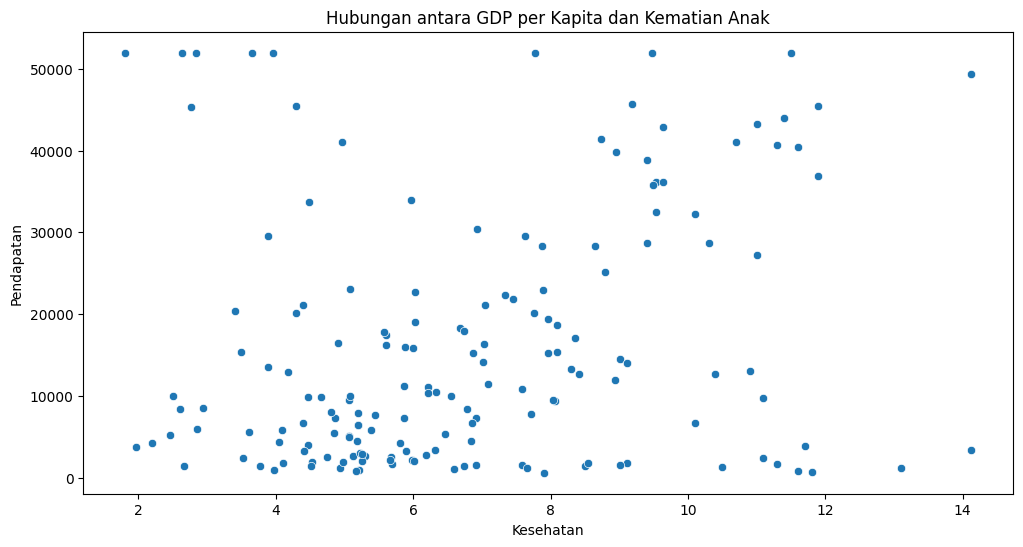

Korelasi antara Kesehatan  dan Pendapatan adalah : 0.24


In [12]:
# Bivariate analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data_capped['Kesehatan'], y=data_capped['Pendapatan'])
plt.title('Hubungan antara GDP per Kapita dan Kematian Anak')
plt.xlabel('Kesehatan')
plt.ylabel('Pendapatan')
plt.show()

# Menghitung korelasi
correlation = data_capped[['Kesehatan', 'Pendapatan']].corr().iloc[0, 1]
print(f'Korelasi antara Kesehatan  dan Pendapatan adalah : {correlation:.2f}')


Grafik scatter plot di atas menunjukkan hubungan antara dua variabel, yaitu Kesehatan dan Pendapatan. Dari grafik tersebut dan hasil perhitungan korelasi, kita bisa menarik beberapa kesimpulan:

 Penjelasan Scatter Plot:
- Sumbu X (Kesehatan): Menunjukkan skor kesehatan.
- Sumbu Y (Pendapatan): Menunjukkan nilai pendapatan.
- Pola Penyebaran Titik: Titik-titik pada scatter plot tersebar cukup luas, dengan sebagian besar berada di rentang pendapatan yang lebih rendah. Tidak terlihat adanya pola linear yang jelas antara dua variabel ini.

 Korelasi:
- Nilai Korelasi: 0.24
  - Nilai ini menunjukkan korelasi yang lemah antara kesehatan dan pendapatan. Korelasi positif yang lemah ini berarti ketika skor kesehatan meningkat, pendapatan cenderung sedikit meningkat juga, tetapi hubungan ini tidak kuat.
  - Korelasi ini juga menunjukkan bahwa ada banyak faktor lain yang mempengaruhi pendapatan dan kesehatan yang mungkin tidak tercakup dalam data ini.


---
---

## 3. Clustering
1. Scale the Data

In [13]:
from sklearn.preprocessing import StandardScaler

# Menyiapkan data untuk clustering
data_for_clustering = data_capped[['Kesehatan', 'Pendapatan']].dropna()

# Scaling data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

- Pada tahap ini, ‘StandardScaler’ diinisialisasi dengan nama ‘scaler’. Fungsi utama dari StandardScaler adalah menstandarisasi fitur dalam dataset, yaitu mengubahnya sehingga memiliki nilai rata-rata (mean) sebesar 0 dan standar deviasi sebesar 1.

- Kemudian, metode ‘fit_transform()’ digunakan untuk menghitung rata-rata dan standar deviasi dari data, serta mengaplikasikan transformasi standarisasi pada data tersebut. Hasilnya adalah ‘data_scaled’, yaitu data yang sudah di-scale dan siap untuk digunakan dalam proses clustering.

2. Decide the number of clusters, you're free to choose the method:
    - Elbow method
    - Silhouette score method
    - Directly decide the number (Elaborate the number and why)

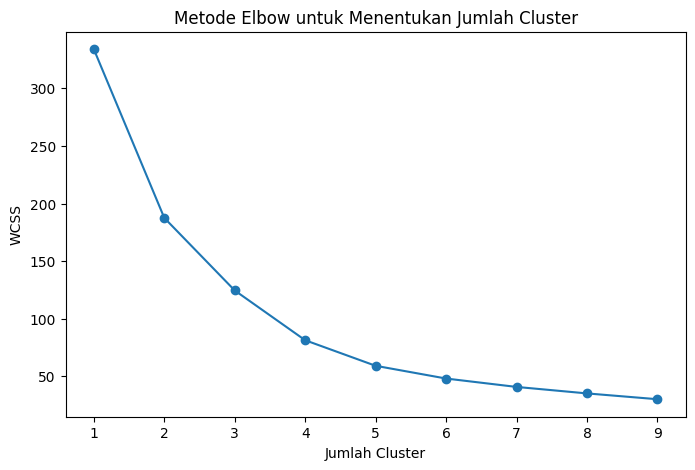

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Menghitung WCSS untuk berbagai jumlah cluster
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=1)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Menampilkan grafik Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()


Dalam grafik di atas, terlihat bahwa penurunan WCSS dari kluster 1 ke kluster 2 sangat tajam, dan terus berkurang hingga kluster 4. Setelah kluster 4, penurunan WCSS mulai lebih landai, yang berarti menambah kluster tidak lagi memberikan penurunan WCSS yang signifikan. Saya memilih n_cluster=4 karena pada titik tersebut terdapat perubahan besar dalam laju penurunan WCSS, yang merupakan titik "belok" atau "siku" paling menonjol pada grafik. Setelah kluster ke-4, penurunan WCSS menjadi lebih lambat, sehingga menambah lebih banyak kluster tidak akan memberikan perbaikan yang signifikan dalam representasi data.

3. Do clustering with the decided amount of cluster.

In [15]:
# Misalkan jumlah cluster yang dipilih adalah 4
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1)
clusters = kmeans.fit_predict(data_scaled)

# Menambahkan hasil clustering ke data asli
data_capped['Cluster'] = clusters

Mengapa Memilih n_cluster=4:

Kluster optimal dipilih berdasarkan titik di mana penurunan WCSS mulai tidak signifikan, yang sering kali terlihat seperti "elbow" pada grafik. Dalam hal ini, elbow terlihat pada kluster ke-4, menunjukkan bahwa menambah lebih banyak kluster setelah 4 tidak memberikan manfaat yang signifikan dalam mengurangi WCSS. Oleh karena itu, jumlah kluster yang optimal adalah 4. Cluster ini dilihat dari grafik elbow sebelumnya.

4. Create the clustering result graph.

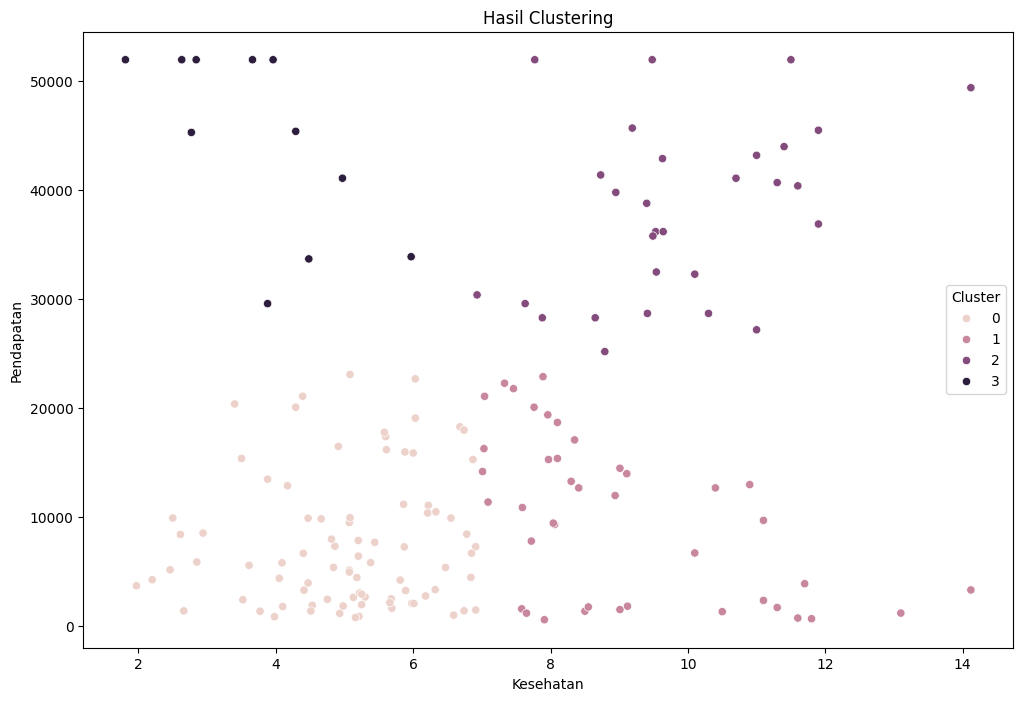

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data_capped['Kesehatan'], 
    y=data_capped['Pendapatan'], 
    hue=data_capped['Cluster'], 
)

plt.title('Hasil Clustering')
plt.xlabel('Kesehatan')
plt.ylabel('Pendapatan')
plt.legend(title='Cluster')
plt.show()

Grafik di samping menunjukkan hasil dari clustering menggunakan empat kluster, yang sebelumnya ditentukan sebagai jumlah kluster optimal menggunakan metode Elbow. Setiap titik pada grafik mewakili satu data yang telah dikelompokkan menjadi empat kluster berbeda, masing-masing diberi label 0, 1, 2, dan 3.

Penjelasan dari Hasil Clustering:
1. Cluster 0 (Warna Paling Terang):
   - Kelompok ini mencakup data dengan nilai pengeluaran kesehatan per kapita yang relatif rendah hingga menengah dan pendapatan bersih yang juga relatif rendah (0 hingga sekitar 20.000).
   - Ini menunjukkan bahwa anggota kluster ini cenderung memiliki akses terbatas terhadap layanan kesehatan dan pendapatan yang rendah, sehingga mereka mungkin memerlukan bantuan finansial.

2. Cluster 1 (Warna Sedikit Lebih Gelap):
   - Data di kluster ini menunjukkan variasi pengeluaran kesehatan yang cukup beragam, tetapi sebagian besar berada di tingkat pengeluaran menengah, dengan pendapatan yang juga berada dalam kisaran rendah hingga menengah (sekitar 10.000 hingga 30.000).
   - Ini menunjukkan bahwa meskipun pengeluaran kesehatan bervariasi, pendapatan di kluster ini cenderung lebih tinggi dibandingkan kluster 0, tetapi mereka mungkin masih memerlukan bantuan, terutama dalam hal biaya kesehatan.

3. Cluster 2 (Warna Lebih Gelap):
   - Kelompok ini terdiri dari individu dengan pendapatan bersih menengah hingga tinggi (sekitar 20.000 hingga 50.000) dan pengeluaran kesehatan yang bervariasi tetapi cenderung lebih tinggi dibandingkan kluster 0 dan 1.
   - Anggota kluster ini memiliki kesehatan yang lebih baik dan pendapatan yang lebih tinggi, menunjukkan kemampuan ekonomi yang lebih kuat.

4. Cluster 3 (Warna Paling Gelap):
   - Ini adalah kluster dengan pendapatan yang sangat tinggi (sekitar 30.000 hingga lebih dari 50.000) dan pengeluaran kesehatan yang beragam tetapi cenderung menengah hingga tinggi.
   - Anggota kluster ini memiliki pendapatan tertinggi dan umumnya dapat membiayai kebutuhan kesehatan mereka dengan baik.

*Interpretasi*:
Hasil clustering ini menunjukkan pola dalam data berdasarkan dua variabel, Kesehatan dan Pendapatan. Ada kecenderungan bahwa pendapatan yang lebih tinggi sering kali dikaitkan dengan kesehatan yang lebih baik, sebagaimana terlihat di kluster-kluster dengan pendapatan tinggi (kluster 2 dan 3). Kluster 0 dan 1 menunjukkan kelompok dengan pendapatan yang lebih rendah, dengan kluster 0 menjadi yang paling rentan dalam hal kesehatan dan pendapatan.


---
---

## 4. Recommendation

1. Choose which country cluster to focus.


In [17]:
data_with_countries = data[['Negara', 'Kesehatan', 'Pendapatan']].copy()
data_with_countries['Cluster'] = data_capped['Cluster'].values

chosen_cluster = 0
print(f"Countries in Cluster {chosen_cluster}:")

Countries in Cluster 0:


Berdasarkan hasil clustering pada grafik tersebut, Cluster 0 (yang ditandai dengan warna paling terang) adalah kluster yang seharusnya difokuskan untuk menerima bantuan. Berikut alasannya:

1. Pendapatan Rendah: Data di Cluster 0 memiliki pendapatan yang relatif rendah, sebagian besar di bawah 20.000. Ini menunjukkan bahwa individu dalam kelompok ini mungkin mengalami kesulitan ekonomi dan mungkin memerlukan dukungan keuangan.

2. Kesehatan Rendah hingga Menengah: Tingkat kesehatan di Cluster 0 juga cenderung lebih rendah dibandingkan kluster lainnya. Ini menunjukkan bahwa mereka mungkin memerlukan bantuan dalam hal layanan kesehatan atau program kesehatan.

Karena anggota Cluster 0 berada dalam kondisi yang lebih rentan secara ekonomi dan kesehatan dibandingkan dengan kluster lain, mereka adalah kelompok yang paling membutuhkan intervensi, seperti program bantuan keuangan, subsidi kesehatan, atau program sosial lainnya.

2. Show which countries included in that cluster.

In [18]:
countries_in_cluster = data_with_countries[data_with_countries['Cluster'] == chosen_cluster]
print(countries_in_cluster[['Negara', 'Kesehatan', 'Pendapatan']])

                  Negara  Kesehatan  Pendapatan
1                Albania       6.55        9930
2                Algeria       4.17       12900
3                 Angola       2.85        5900
4    Antigua and Barbuda       6.03       19100
6                Armenia       4.40        6700
..                   ...        ...         ...
162              Vanuatu       5.25        2950
163            Venezuela       4.91       16500
164              Vietnam       6.84        4490
165                Yemen       5.18        4480
166               Zambia       5.89        3280

[86 rows x 3 columns]


3. Among those countries, choose the best coutries to receive help
    - Remember, USD 10 Mil. is a small amount for this kind of cause, choose the countries wisely.
    - Elaborate the reason you chose them.

In [19]:
sorted_countries = countries_in_cluster.sort_values(by=['Kesehatan', 'Pendapatan'])
print("Top countries to receive help:")
print(sorted_countries.head())

Top countries to receive help:
           Negara  Kesehatan  Pendapatan  Cluster
107       Myanmar       1.97        3720        0
116      Pakistan       2.20        4280        0
38    Congo, Rep.       2.46        5190        0
154  Turkmenistan       2.50        9940        0
70      Indonesia       2.61        8430        0


 Negara-Negara Teratas untuk Menerima Bantuan:

1. Myanmar:
   - Kesehatan: 1,97
   - Pendapatan: 3720
   - Alasan Pemilihan: Myanmar memiliki pengeluaran kesehatan per kapita terendah di antara negara-negara yang terdaftar, yang menunjukkan kebutuhan besar untuk investasi dalam layanan kesehatan. Selain itu, pendapatan per kapita yang rendah menunjukkan bahwa penduduk mungkin kesulitan untuk membiayai perawatan kesehatan penting, menjadikan Myanmar prioritas untuk menerima bantuan.

2. Pakistan:
   - Kesehatan: 2,20
   - Pendapatan: 4280
   - Alasan Pemilihan: Pakistan juga memiliki pengeluaran kesehatan per kapita yang sangat rendah dan pendapatan per kapita yang rendah. Dengan populasi yang besar dan tantangan kesehatan yang signifikan, bantuan yang ditargetkan pada sektor kesehatan bisa berdampak luas dalam meningkatkan kesehatan masyarakat dan produktivitas ekonomi.

3. Kongo, Rep.:
   - Kesehatan: 2,46
   - Pendapatan: 5190
   - Alasan Pemilihan: Republik Kongo memiliki pengeluaran kesehatan yang sedikit lebih tinggi daripada Myanmar dan Pakistan, tetapi masih masuk dalam kategori pengeluaran rendah. Dikombinasikan dengan pendapatan per kapita yang rendah, hal ini menjadikan Kongo kandidat penting untuk menerima bantuan, terutama dalam hal infrastruktur kesehatan dan aksesibilitas.

 Alasan Tidak Memilih Indonesia dan Turkmenistan:
- Indonesia:
   - Kesehatan: 2,61
   - Pendapatan: 8430
   - Alasan: Meskipun Indonesia masih berada di dalam Klaster 0, tingkat pengeluaran kesehatan dan pendapatannya lebih tinggi dibandingkan dengan Myanmar, Pakistan, dan Kongo. Mengingat sumber daya yang terbatas, mungkin lebih efektif untuk memprioritaskan negara-negara dengan tingkat investasi kesehatan dan pendapatan yang lebih rendah.

- Turkmenistan:
   - Kesehatan: 2,50
   - Pendapatan: 9940
   - Alasan: Turkmenistan memiliki pendapatan per kapita tertinggi di antara negara-negara di Klaster 0, yang menunjukkan kapasitas yang lebih baik untuk membiayai kesehatan secara internal. Oleh karena itu, kebutuhan bantuan keuangan eksternal untuk Turkmenistan tidak begitu mendesak dibandingkan dengan negara-negara lain yang terdaftar.

 Kesimpulan:
Penggunaan dana $10 juta yang paling efektif adalah dengan fokus pada Myanmar, Pakistan, dan Republik Kongo. Negara-negara ini menunjukkan kebutuhan terbesar baik dari segi pengeluaran kesehatan maupun tingkat pendapatan, menjadikan mereka pilihan yang paling berdampak untuk menerima bantuan.

---
---

## 5. Deliverables

1. What:
    - PDF file of the report presentation slide.
    - Notebook (.ipynb) file
<br><br>
2. How:
    - Pack them into compressed archive file (.zip/.rar).
    - Upload them to google drive.
    - Submit the link to sanbercode web.